In [10]:
%matplotlib inline

# SOFTWARE AND COMPUTING FOR PHYSICS

### Enrico Giampieri, PhD (enrico.giampieri@unibo.it)

### Prof. Daniele Bonacorsi, PhD (daniele.bonacorsi@unibo.it)

### Prof. Lorenzo Rinaldi, PhD (lorenzo.rinaldi@unibo.it)

### https://github.com/UniboDIFABiophysics/programmingCourseDIFA

## about the course

This course is designed to refresh general concept of programming, leveraging high level, dinamic programming.

We will employ Python as a model language, but all these concepts will be applicable in general

## program

### module 1 topics (more or less 2 hours each)

1. introduction to the bash command line
1. introduction to python
1. version control
1. testing
1. documentation and collaborative working
1. object oriented programming
1. functional programming

...

8. numerical calculus and vectorization
1. scientific libraries and symbolic algebra
1. visualization
1. databases and dataframes
1. data pipeline and data formats
1. introduction to machine learning

## module 2 will differ for applied physics and nuclear physics

## The exam

* You will be evaluated on a programming project;
* this project needs to be hosted on a public repository;
* you are free to choose the programming language of the project;
* accepted control version systems are git and fossil;
* there will be a list of suggested projects, or you can propose your own;
* projects in combination for other exams are welcome.

The evaluation method is the following:

* clarity of the repository commit history (6 point)
* clarity and completeness of the documentation and source code (12 point)
* presence and executability of test routines (12 point)

Optionally, the evaluation will be improved on the basis of the following topics:

* Usage of innovative technologies and libraries (up to 3 points)
* Contribution to open source projects (up to 6 points)

## The rationale

You have received some basic programming.

Most of you haven't used it since, as it seemed like a very difficult task for little gain.

The main goal of this course is to show you that this is not the case, and to give the instruments to learn yourself how to be proficient with programming.

## Is it useful?

In [11]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
[x**2 for x in data if x%2==0]

[4, 16, 36, 64]

In [12]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]

def is_even(number):
    return number%2==0

[x**2 for x in data if is_even(x)]

[4, 16, 36, 64]

In [13]:
from sympy.abc import x, y, z

f = x**2 + y**2
f.diff(x)

2*x

In [14]:
from sympy import solve

f = x**2 -x
solve(f, x)

[0, 1]

In [15]:
from uncertainties import ufloat

x = ufloat(1, 0.1)  # x = 1+/-0.1
y = ufloat(2, 0.3)

print( (x+y)/y )

1.50+/-0.09


In [16]:
from pint import UnitRegistry
ureg = UnitRegistry()

distance = 24.0 * ureg.meter
time = 8.0 * ureg.second
speed = distance / time
print(speed)

3.0 meter / second


In [17]:
position = ureg.Quantity(ufloat(1, 0.1), 'meter')
time = ureg.Quantity(ufloat(2, 0.1), 'second')
print(position/time)

0.50+/-0.06 meter / second


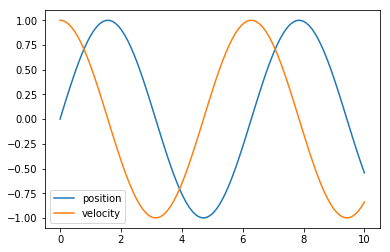

In [18]:
from scipy.integrate import odeint

def harmonic(state, t):
    position, speed = state
    return (speed, -position)

time = plt.linspace(0, 10, 100)
y0 = [0, 1]

result = odeint(harmonic, y0=y0, t=time)

# -----------------------------------------

import pylab as plt
lines = plt.plot(time, result)
plt.legend(lines, ['position', 'velocity'])

In [5]:
import PySimpleGUI as sg

text = sg.PopupGetText('Enter a command:')
print(text)
eval(text)

2**3


8

In [21]:
import os
from glob import glob as list_file

for old_name in list_file('*.jpeg'):
    new_name = old_name.replace('jpeg', 'jpg')
    os.rename(old_name, new_name)

In [22]:
from kanren import Relation, facts, var, run
parent = Relation()
facts(parent, ("Homer", "Bart"),
              ("Marge", "Bart"),
              ("Homer", "Lisa"),
              ("Marge", "Lisa"),
              ("Homer", "Maggie"),
              ("Marge", "Maggie"),
              ("Abe",  "Homer"))

y = var()
x = var()
run(0, x, parent(x, y), parent(y, 'Bart'))

('Abe',)

In [23]:
from pulp import LpProblem, LpMaximize, LpVariable

prob = LpProblem("work-life balance", LpMaximize)

x1 = LpVariable("hours_work", lowBound=0, upBound=12)
x2 = LpVariable("hours_play", lowBound=0)

# The objective function is added to 'prob' first
prob += x2

# The constraints are entered
prob += 10*x1 - 5*x2 -10 >=0, "Balance cost of life"
prob += x1 + x2 <= 16, "There is only so much time"

prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)

hours_play = 10.0
hours_work = 6.0


In [24]:
import networkx as nx
G = nx.Graph()

G.add_edge("Enrico", "Python")
G.add_edge("Claudia", "Python")
G.add_edge("Claudia", "R")
G.add_edge("Nico", "Python")
G.add_edge("Nico", "C++")
G.add_edge("Daniel", "Matlab")
G.add_edge("Daniel", "C++")
G.add_edge("Alessandra", "Matlab")
G.add_edge("Alessandra", "Python")

nx.shortest_path(G, "R", "C++")

['R', 'Claudia', 'Python', 'Nico', 'C++']

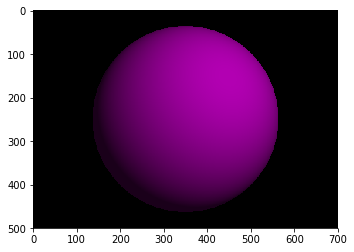

In [25]:
import vapory as vp

camera = vp.Camera( 'location', [0, 2, -3], 'look_at', [0, 1, 2] )
light = vp.LightSource( [2, 4, -3], 'color', [1, 1, 1] )
sphere = vp.Sphere( [0, 1, 2], 2, vp.Texture( vp.Pigment( 'color', [1, 0, 1] )))

scene = vp.Scene( camera, objects= [light, sphere] )

image = scene.render(width=700, height=500)

# -----------------------------------------

import pylab as plt
plt.imshow(image)

In [6]:
#%%file hello.py

from flask import Flask
app = Flask(__name__)

@app.route("/")
def list_files():
    import os
    filenames = os.listdir()
    text = " <BR> ".join(filenames)
    return text

@app.route('/<extension>')
def show_user_profile(extension):
    from glob import glob
    filenames = glob(f"*.{extension}")
    text = " <BR> ".join(filenames)
    return text


from werkzeug.serving import run_simple
run_simple('localhost', 5000, app)

 * Running on http://localhost:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Feb/2019 14:34:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2019 14:35:07] "GET /png HTTP/1.1" 200 -
127.0.0.1 - - [28/Feb/2019 14:35:15] "GET /svg HTTP/1.1" 200 -


In [7]:
import pyautogui as pag

new_tab = (1876, 41)
search_bar = (768, 83)

pag.moveTo(*new_tab, duration=2) 
pag.click() 
pag.moveTo(*search_bar, duration=2) 
pag.click() 
pag.typewrite("let me google that for you\n", interval=0.1)

KeyboardInterrupt: 

In [12]:
from yattag import Doc

doc, tag, text = Doc().tagtext()

img_loc = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Cub_with_trophy.jpg/220px-Cub_with_trophy.jpg'

with tag('h1'):
    text('Good boy!')
    doc.stag('br')
    doc.stag('img', src=img_loc)

# *******************************
from IPython.display import HTML
HTML(doc.getvalue())

./fractal_wrongness.png PNG 595x496 RGB


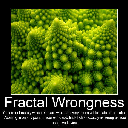

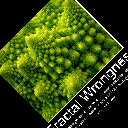

In [28]:
from PIL import Image
from IPython.display import display
filename = "./fractal_wrongness.png"

with Image.open(filename) as im:
    print(filename, im.format, "%dx%d" % im.size, im.mode)
    resized = im.resize((128, 128))
    display(resized)
    
    display(resized.rotate(45))

In [92]:
from plumbum import local

for file in local.cwd//'*.png':
    size = file.stat().st_size
    print(f"{file.name.ljust(21)}{str(size).rjust(10)}")
    

fractal_wrongness.png    370765
__temp_ipython__.png      28246


In [10]:
from bioservices import KEGG
k = KEGG(verbose=False)
k.get_pathway_by_gene("7535", "hsa")

{'hsa04014': 'Ras signaling pathway',
 'hsa04064': 'NF-kappa B signaling pathway',
 'hsa04650': 'Natural killer cell mediated cytotoxicity',
 'hsa04658': 'Th1 and Th2 cell differentiation',
 'hsa04659': 'Th17 cell differentiation',
 'hsa04660': 'T cell receptor signaling pathway',
 'hsa05340': 'Primary immunodeficiency'}

## Introduction to the UNIX shell

the most commonly used shell is called **bash**, and we will refer to that one as the standard implementation.

A very similar shell is present in OSX, and is possible to install it under window activating the `Windows Subsystem for Linux` option in the control panel.

## Why learning the bash shell

Graphical User Interfaces (GUI) are useful, but they are no always available in all the systems.

Serves, for example, are often only manageable.

Also, once you are used to it, it gives you a faster, more reliable way to perform your tasks: you are trading memory for speed (we will come back to this)

bash and similar shells are sometimes referred as Command Line Interfaces (CLI)

## Structure of a shell

The bash is a type of shell.
**shells** are interactive systems that take user input in the form of text commands and perform actions based on them

most systems in a computer provide a shell interface:

* bash: a shell of the operating system
* IPython: a shell to interface to a python engine
* most databases will provide one
* etc ...

The commands can be given **interactively**, by actually typing each command, or using a **script**, where the commands are pre-written and get executed one command at the time.

For all intent and purposes, bash scripts can be used a program.

As a matter of fact, big chuncks of unix systems are just a collection of bash scripts.

They can also be used to glue together various programs that provide a CLI.
Most programs provide one, even if you might not know about it, such as:
* firefox
* openoffice
* vlc


## CLI

Command line interfaces of programs allows automation of work.
One does not need to remember and perform the exact sequence of action each time they want to perform the same task, but might save the relevant command on a small bash script and execute it directly.

This also allows **batch execution**, i.e. repeat the same task on a (potentially huge) number of files all at the same time.

For example, this converts all the JPG images in the current directory into GIF thumbnails in a "thumbs" sub-directory

    mogrify -format gif -path thumbs -thumbnail 100x100 *.jpg

the same process with GUI tools?

1. open the GUI of your program
2. open image #1
3. resize it to thumbnail size
4. save it as gif in the right folder
5. close the image
6. repeat step 2-5 as many time as needed
7. close the GUI

## file system, disks and partitions

The file system is the way that the operating system uses to organize the files in your disk.

It traditionally organize the files in various directories

It can merge the content of various local disks (and remote ones) in a transparent way

The location of a file (or a directory) is represented with a string, where the `/` is used to separate between directories.
Most programming languages (including Python) follow this convention
**note** windows use `\` to separate directory, just to make things easier for all of us.
Get used to this, we will see it often...

![](https://imgs.xkcd.com/comics/standards.png)

![](./directory_structure.png)

![](./OS_structure.png)

## File ownership and permissions

each file is owned by a user, and a group (of which the owner usually is part of, but not necessarely).

every time a user want to interact with the file, the permissions are given based on:

* is it the owner?
* if not, does it belong to the group?
* anybody else

The permission are related to:

* **reading**
* **writing**
* **executing** (or **entering** for directories)

![](./users_and_groups.png)

![](./file_inode_permissions.png)

#### file name and extension

by tradition, file names ends with a full stop and 3 (or more) letters, that are used to quickly identify what kind of file it is.

Some common extensions are:
* `.exe` windows executable
* `.sh` bash script
* `.txt` raw text files
* `.doc`, `.docx` Office Word files
* `gif`, `png`, `jpg` image files

The reality is that there is no rule linking the content of a file to its extension: you could rename a `jpg` image as a `txt` file, but the content would still just be the previous image.


### Some basic bash commands

Bash comes with a long list of pre-installed programs that provide several utilities.

The ones that are (for our purpose) most important are the ones that allow you to move around and manipulate the file system and the files inside it.

#### `ls` --- list content of a directory
* `ls` list all the files in the currect directory
* `ls <directory_name>` list all the file in the given directory
* `ls -l` list the files, including some metadata about them
* `ls -l -h` show file sizes in human readable format
* `ls -l -h -S` sort them by size (greatest to smallest)
* `ls -l -h -S -r` invert the order of sorting
* `ls -lhSr` short form of the previous one
* `ls -l -t` sort them by the time of last edit (most recent to oldest)
* `ls -l -R` show them recursively (this directory and all the subdirectory)


#### file name expansion

see: https://www.gnu.org/software/bash/manual/html_node/Pattern-Matching.html

* `*` 	any number (including none) of characters of any kind
* `?` 	a single (one and only one) character of any kind
* `[characters]` a single (one and only one) character included in the list of characters specified
* `[[:classname:]]` a single (one and only one) character belonging to a specific character class. For example, if you use `[[:alnum:]]`, bash will match a character only if it is alphanumeric. Supported character classes include: `alnum`, `alpha`, `ascii`, `blank`, `cntrl`, `digit`, `graph`, `lower`, `print`, `punct`, `space`, `upper`, `word`, `xdigit`

----

* `ls *.txt` list all the text file
* `ls document.*` list all the file whose name is `document` and have any kinf of extension


#### `cd` --- change directory

* `cd <directory_name>` goes to that directory
* `cd ~` goes back to the home directory
* `cd -` goes back to the previous folder
* `cd ..` goes the directory above the current one

#### mv --- move and rename files and directories

* `mv <base_file> <new_location>` change position (and rename) a single file
* `mv <file1> <file2> <file3> <destination_directory>` move several files to a directory
* `mv -i <origin> <destination>` ask for confirmation before moving if it's going to override
* `mv -u <origin> <destination>` move only if the origin is newer than the destination


#### rm --- remove a file

* `rm <filename>`
* `rm -r <>` recursive elimination (remove inside directories that are not empty)
* `rm -i <>` ask authorization before all removal
* `rm -f <>` remove files without asking permission 


#### cp --- copy a file

* `cp <base_file> <new_location>`

#### mkdir --- create directories

* `mkdir <directory_name>` create the directory inside the current one (gives error if it does already exists)
* `mkdir -p <directory_name>` same as before, but create it only if it does not exists
* `mkdir <dir/subdirectory>` create both the directory and the subdirectory directly (any number of levels)

#### `chown` and `chmod` change file ownership and permissions

**chown** allows to change either the user or the group (or both) that owns a file.

**chmod** allows to change the permission of the file

#### `ssh` and `scp` --- secure remote server access and file copy

**ssh** open a system shell (typically bash on a unix server) on a remote server, and allow to interact with it as if it was a local shell, but using remote resources

**scp** allows to exchange files between the local machine and a remote server, with a syntax similar to the cp command.

#### random commands

* `man <command>` give the complete help on the command
* `pwd` print the current working directory
* `top`/`htop` display informations about the system
* `nano`/`vim` edit text files
* `touch <filename>` create and empty file, or refresh the last modify date of an existing one

## Pipes

**Pipes** are a methods of the bash shell that allow to manage the flow of the data inside and outside of a program, and between programs.

Any program have various "streams":


* STDIN (0) - Standard input (data fed into the program)
* STDOUT (1) - Standard output (data printed by the program, defaults to the terminal)
* STDERR (2) - Standard error (for error messages, also defaults to the terminal)

each one of these can be redirected to other places.
The basic redirection is done with the `>` and `<` operators.

### input redirection

a program that takes parameters as text input from the user can be automated by passing it a file containing the input.

    myprogram < input_file.txt

### output redirection

create (or overwrite) a file with all the output of the program

    myprogram > all_output_file.txt
    
append (do not replace) the existing file with the output (good for logging)
    
    myprogram >> all_output_file.txt

redirecting separately standard output and standard error streams

    myprogram 1> regular_output_file.txt   2> error_output_file.txt      


### piping to other programs

the `|` (pipe) allows to take the output of a program and use it directly as the input of another, without creating intermediate files.

* `ls *.txt | head -3` list all the `.txt` files, shows only the first 3

# IPython

the main way we will use to interact with python will be the ipython shell.

#### ipython special pre-commands

* `%<magic function>` use magic functions
* `%%<cell magic>` use cell magic mode
* `!<function>` call system programs (non interactive)
* `/<function>` activate autocalling


    /print "a"


* `,<function>` (comma) activate autocalling and autoquoting (divide by whitespace)
* `;<function>` (comma) activate autocalling and autoquoting (ignore whitespaces)


    ,my_function a b c    # becomes my_function("a","b","c")
    ;my_function a b c    # becomes my_function("a b c")
    
all of thse should be used as the first letter, the only exception being `!`, that can follow the `=` assignment

* `?` general help
* `<object>?` help of an object
* `pattern?` return all the variables in the namespace that follow the pattern

In [66]:
%whos

Variable   Type        Data/Info
--------------------------------
a          list        n=2
attach     function    <function attach at 0x7f638c121378>
b          int         2
data       dict        n=2
info       SList       ['Filesystem     1K-block<...>584   1% /run/user/1000']
l          SList       ['Lesson 1 - introduction<...>ME.md', 'Untitled.ipynb']
l1         SList       ['/bin/bash: !ls: command not found']
l2         SList       ['Lesson 1 - introduction<...>ME.md', 'Untitled.ipynb']
lal        int         1
lel        int         3
lol        int         2


In [67]:
%who_ls int

['b', 'lal', 'lel', 'lol']

In [78]:
%whos list

Variable   Type    Data/Info
----------------------------
a          list    n=2


In [218]:
import numpy as np

def myfun(n=1000, k=10):
    a = 1
    a = np.random.randn(1, n)
    for i in range(k):
        a = np.random.randn(n, n)
    a = np.random.randn(n, 1)
    a = np.random.randn(n).reshape(n, 1)
    return None

In [219]:
%prun -T out.txt myfun()

 
*** Profile printout saved to text file 'out.txt'. 


In [220]:
!cat out.txt

         18 function calls in 0.382 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       13    0.381    0.029    0.381    0.029 {method 'randn' of 'mtrand.RandomState' objects}
        1    0.001    0.001    0.382    0.382 <ipython-input-218-7ec54cd088a8>:3(myfun)
        1    0.000    0.000    0.382    0.382 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.382    0.382 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [221]:
%memit myfun()

peak memory: 176.84 MiB, increment: 30.29 MiB


In [222]:
%timeit myfun()

371 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [223]:
#%load_ext line_profiler
%lprun -T out.txt -f myfun myfun()


*** Profile printout saved to text file 'out.txt'. 


In [224]:
!cat out.txt

Timer unit: 1e-06 s

Total time: 0.373999 s
File: <ipython-input-218-7ec54cd088a8>
Function: myfun at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def myfun(n=1000, k=10):
     4         1          1.0      1.0      0.0      a = 1
     5         1         83.0     83.0      0.0      a = np.random.randn(1, n)
     6        11         24.0      2.2      0.0      for i in range(k):
     7        10     372958.0  37295.8     99.7          a = np.random.randn(n, n)
     8         1        885.0    885.0      0.2      a = np.random.randn(n, 1)
     9         1         47.0     47.0      0.0      a = np.random.randn(n).reshape(n, 1)
    10         1          1.0      1.0      0.0      return None

In [10]:
import os
ret = !cat /proc/{os.getpid()}/status
ret.fields(0, 1)[:5]

['Name: ZMQbg/1', 'Umask: 0002', 'State: S', 'Tgid: 22797', 'Ngid: 0']

In [10]:
s = "ciao"
print(bytes(s, encoding='ascii'))
print(bytes(s, encoding='utf8'))
print(bytes(s, encoding='latin1'))

print('-'*10)
s = "ciaè"
print(bytes(s, encoding='latin1'))
print(bytes(s, encoding='utf8'))

b'ciao'
b'ciao'
b'ciao'
----------
b'cia\xe8'
b'cia\xc3\xa8'
----------
b'123'
b'123'


In [17]:
ord('\xe8')

232

In [18]:
chr(232)

'è'

In [28]:
import locale
language, encoding = locale.getdefaultlocale()
print(f"default language: '{language}'")
print(f"default encoding: '{encoding}'")
language, encoding = locale.getlocale()
print(f"default language: '{language}'")
print(f"default encoding: '{encoding}'")

default language: 'it_IT'
default encoding: 'UTF-8'
default language: 'it_IT'
default encoding: 'UTF-8'


In [34]:
import re
regex = re.compile('[ ]+')
re.sub(pattern=regex, string="ciao     mondo    !", repl='·') 

'ciao·mondo·!'